Salut!  
On t'a importé la partie la plus intéressante notre base de données de films, que tu trouveras dans la variable __sc_films__ sous la forme d'un DataFrame pandas. Les différentes colonnes sont :
 - id : id du film dans notre base
 - title : titre du film
 - date_release : date de sortie du film. Si le jour ou le mois est égal à 00, c'est qu'il est inconnu.
 - rating : moyenne SensCritique de l'oeuvre, basée sur les notes des utilisateurs et pondérée en fonction de la fiabilité de l'utilisateur. Elle est souvent différente de la moyenne "brute" arithmétique de l'ordre d'un ou deux dizièmes. Exception notable : lorsque beaucoup d'utilisateurs créent un compte uniquement pour booster un film, ils augmentent ainsi artificiellement sa moyenne arithmétique, mais la moyenne SensCritique reste assez basse.
 - wish_list_count : nombre d'utilisateurs qui ont mis ce produit en envie
 - review_count : nombre de critiques de ce film
 - list_count : nombre de listes contenant ce produit
 - n_i : nombre d'utilisateurs ayant atrribué la note i (par exemple, n_3 : nombre d'utilisateur qui ont attribué un 3) 

In [2]:
import pandas as pd

In [3]:
sc_films = pd.read_csv('sc_films.csv')
top_100_films = pd.read_csv('top_100_films.csv')

Ton objectif est d'utiliser les données de __sc_films__ pour créer ton propre classement qui sera le plus proche possible du top 100, et qui le prolongera pour créer un top 200. Tu peux utiliser les features de __sc_films__ comme tu préfères, et donner à la fin de ton code ton classement des __200__ meilleurs films du site, sous la même forme que __top_100_films__, avec 200 films au lieu de 100, stocker ton classement dans une variable __top_200_films__.  
Pendant ton développement, tu peux bien sûr évaluer la qualité de ton classement en le comparant au top 100 que nous t'avons donné. Cependant, pour éviter l'overfitting, on comparera le classement que tu nous donnes à la partie cachée du top 100, qui contient les films entre la 101e et la 200e place.  
Heuristiquement, ton top devra représenter les films à la fois les mieux notés et les plus regardés. Attention, beaucoup d'utilisateurs ayant établi leur top 10 avant 2015, les films sortis après cette date sont moins susceptibles d'être dans les top 10 des utilisateurs, et donc dans le top 100.

In [3]:
#top_200_films.to_csv('top_200_films.csv', index=False)

On commence par regarder la table et ses différentes caractéristiques. On ferra attention à regarder la présence éventuelle de valeures manquantes dans la table. 
On sort également les premiers indicateurs de statistiques descriptives

In [6]:
import numpy as np
n_i = list(sc_films.columns[7:17])
sc_films['rating_count'] = sc_films[n_i].apply(sum, axis=1)
sc_films['popularity'] = sc_films.rating * np.log10(sc_films.rating_count)
sc_films['rank'] = sc_films.popularity.rank(ascending=False)
top_200_films = sc_films.sort_values('rank').iloc[:200]
top_200_films.head()

,id,title,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10,rating_count,popularity,rank
2401,445539,Pulp Fiction,1994-09-10,833,20703,590,33039,4226,2052,2405,2952,5243,9134,22591,46271,46478,34763,176115,4369.748357,1.0
2402,363185,Fight Club,1999-09-10,817,18462,752,29659,5615,2684,3127,3949,6256,10343,24351,49070,45886,34955,186236,4305.641990,2.0
2381,1367079,Le Voyage de Chihiro,2001-07-27,838,7984,367,22308,171,110,235,378,964,2694,9711,22555,22944,14697,74459,4082.666613,3.0
2396,408277,Forrest Gump,1994-07-06,795,10158,403,16438,628,447,768,1256,2998,7352,20952,35758,27847,20117,118123,4032.505902,4.0
2364,376627,Princesse Mononoké,1997-07-12,837,8137,384,21763,112,86,168,339,888,2701,8685,18414,19454,13036,63883,4022.107498,5.0


In [4]:
sc_films.head()

,id,title,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10
0,384461,"Cliffhanger, traque au sommet",1993-05-20,582,453,47,1087,43,103,227,490,1068,1605,1049,326,63,28
1,413007,Doom,2005-10-20,372,365,89,816,448,879,1141,1038,765,464,182,61,13,11
2,399603,Astérix et les Vikings,2006-04-05,536,337,35,552,46,143,265,608,1460,1520,736,170,30,25
3,380672,À tombeau ouvert,1999-10-22,691,2654,42,1762,15,32,74,187,461,1035,1659,1116,345,81
4,419113,Rebecca,1940-03-21,767,2251,60,2336,6,8,18,47,146,505,1467,1789,746,273


In [5]:
sc_films.dtypes

id                  int64
title              object
date_release       object
rating              int64
wish_list_count     int64
review_count        int64
list_count          int64
n_1                 int64
n_2                 int64
n_3                 int64
n_4                 int64
n_5                 int64
n_6                 int64
n_7                 int64
n_8                 int64
n_9                 int64
n_10                int64
dtype: object

La date n'est pas en format 'date' il conviendra de la recoder si besoin pour le reste de l'analyse

In [6]:
sc_films.isna().sum()

id                 0
title              0
date_release       0
rating             0
wish_list_count    0
review_count       0
list_count         0
n_1                0
n_2                0
n_3                0
n_4                0
n_5                0
n_6                0
n_7                0
n_8                0
n_9                0
n_10               0
dtype: int64

Aucune valeurs manquantes dans les variables

In [7]:
sc_films.describe(include = 'all')

,id,title,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10
count,2.403000e+03,2403,2403,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000
unique,NaN,2372,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,La Belle et la Bête,2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.275683e+06,NaN,NaN,633.062838,2905.914690,174.598835,3430.097378,241.018310,348.854349,576.206825,979.677070,1780.829380,3141.349147,4474.712859,3652.550146,1595.624636,694.642114
std,6.458127e+06,NaN,NaN,110.241400,2529.617854,158.073415,3640.034873,532.216393,556.295487,707.894190,969.435637,1479.118669,2429.878201,4125.193133,4954.621183,3195.731515,1840.083027
min,3.609290e+05,NaN,NaN,168.000000,172.000000,8.000000,205.000000,2.000000,1.000000,3.000000,9.000000,50.000000,112.000000,68.000000,26.000000,4.000000,1.000000
25%,4.042575e+05,NaN,NaN,563.500000,1006.000000,73.000000,1291.500000,38.000000,59.000000,132.000000,300.000000,745.000000,1449.000000,1761.500000,868.000000,211.000000,94.000000
50%,4.490780e+05,NaN,NaN,652.000000,2180.000000,129.000000,2197.000000,90.000000,152.000000,319.000000,683.000000,1353.000000,2350.000000,2973.000000,1949.000000,598.000000,220.000000
75%,4.931665e+05,NaN,NaN,715.000000,3978.000000,216.000000,4074.000000,232.500000,401.500000,741.000000,1291.000000,2401.500000,4190.000000,5709.500000,4236.000000,1491.000000,556.000000


On remarque la présence de doublon au niveau des titres de films, il est donc nécessaire de s'y pencher un peu plus

In [8]:
a= sc_films['title'].duplicated()
a.value_counts()


False    2372
True       31
Name: title, dtype: int64

On sort donc la liste des doublons sous forme de df

In [9]:
dup = pd.DataFrame(sc_films[sc_films['title'].duplicated() == True])
dup

,id,title,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10
593,17256230,Victoria,2016-09-14,612,1838,127,1677,39,100,228,489,1148,2216,2289,761,110,27
770,10561755,Les Sept Mercenaires,2016-09-22,593,2285,165,1853,69,113,326,663,1419,2556,2263,848,181,62
863,7936957,La Belle et la Bête,2014-02-12,488,1114,267,1378,255,529,1022,1555,2132,1914,1184,439,111,86
1040,36300047,Les Misérables,2019-11-20,777,6790,208,3529,72,22,44,86,216,635,2145,4446,2215,655
1330,449786,Evil Dead,1981-10-15,704,2935,165,4754,83,112,226,429,980,2321,4567,3423,1213,520
1382,366382,Massacre à la tronçonneuse,1974-10-01,720,4005,184,5822,117,147,264,535,1041,2210,4054,3539,1677,913
1417,405047,La Belle et la Bête,2017-03-15,572,2764,246,2651,181,330,708,1377,2618,3814,3226,1621,563,370
1487,498478,L'Illusionniste,2007-01-17,657,3017,75,1524,45,119,304,675,1613,3586,5007,3049,948,331
1629,433306,RoboCop,1987-07-17,709,2900,169,5534,73,151,252,536,1405,3172,5614,4374,1545,719
1654,438293,Dumbo,1941-10-31,669,1039,72,3365,66,120,226,647,2102,4691,5876,3077,997,503


A première vue il s'agit de remake porant le même nom, vérifions cela

In [10]:
sc_films.loc[sc_films['title']== 'Le Livre de la jungle']

,id,title,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10
1590,11024514,Le Livre de la jungle,2016-04-07,632,3452,255,2975,93,153,384,892,2164,4598,5504,2572,589,212
2114,387893,Le Livre de la jungle,1967-10-18,731,1130,62,6314,35,63,163,460,1708,5146,11457,9575,3287,1391


In [11]:
columns  = ['id', 'title', 'date_release', 'rating', 'wish_list_count', 'review_count', 'review_count', 'list_count', 
           'n_1', 'n_2', 'n_3', 'n_4', 'n_5', 'n_6', 'n_7', 'n_8', 'n_9', 'n_10']
dup = pd.DataFrame(dup, columns=columns)

b= dup['id'].duplicated()
b.value_counts()

False    31
Name: id, dtype: int64

On voit bien que chaque film est unique nous pouvons donc continuer notre analyse, nous faisons au cas où le test sur la base test

In [12]:
b = top_100_films['title'].duplicated()
b.value_counts()

False    100
Name: title, dtype: int64

In [13]:
sc_films.describe()

,id,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10
count,2.403000e+03,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000,2403.000000
mean,3.275683e+06,633.062838,2905.914690,174.598835,3430.097378,241.018310,348.854349,576.206825,979.677070,1780.829380,3141.349147,4474.712859,3652.550146,1595.624636,694.642114
std,6.458127e+06,110.241400,2529.617854,158.073415,3640.034873,532.216393,556.295487,707.894190,969.435637,1479.118669,2429.878201,4125.193133,4954.621183,3195.731515,1840.083027
min,3.609290e+05,168.000000,172.000000,8.000000,205.000000,2.000000,1.000000,3.000000,9.000000,50.000000,112.000000,68.000000,26.000000,4.000000,1.000000
25%,4.042575e+05,563.500000,1006.000000,73.000000,1291.500000,38.000000,59.000000,132.000000,300.000000,745.000000,1449.000000,1761.500000,868.000000,211.000000,94.000000
50%,4.490780e+05,652.000000,2180.000000,129.000000,2197.000000,90.000000,152.000000,319.000000,683.000000,1353.000000,2350.000000,2973.000000,1949.000000,598.000000,220.000000
75%,4.931665e+05,715.000000,3978.000000,216.000000,4074.000000,232.500000,401.500000,741.000000,1291.000000,2401.500000,4190.000000,5709.500000,4236.000000,1491.000000,556.000000
max,3.879429e+07,870.000000,20703.000000,1377.000000,33039.000000,8919.000000,7296.000000,6187.000000,8157.000000,13340.000000,22694.000000,35502.000000,49070.000000,46478.000000,34955.000000


Les premières intuitions pour établir un classement serait de faire une moyenne pondérée par des coefficients sur des variables qui semblent plus importantes que d'autres.
Pour établir une première approche on en choisira donc 4 :
 - rating : c'est l'indicateur qui semble le plus pertinent car il reflete une note pondérée laissée par les utilisateurs
 - wish_list_count : Mettre un film dans sa liste d'envie montre un intérêt particulier et positif de la part d'une personne, toutefois le film n'a donc pas été vu et donc semble peu/pas pertinent pour le classement
 - review_count : c'est un indicateur qui permet de montrer que le film a suscité un intérêt, on peut considérer qu'un utilisateur laissant une review a vu le film.
 - list_count : C'est un indicateur d'intérêt une liste n'est pas forcément un indicateur de préférence d'un film, mais toutefois on peut considérer que un film dans une liste a été vu (sachant que wish_list_count est dédié aux films non vu). On peut également considérer cette variable comme relativement forte, en supposant qu'une liste est créée pour garder en mémoire un film déjà vu et que l'on conseillerait ou que l'on aimerait revoir

Les n_i ne sont pas pris en compte, car ils sont très corrélés et reflete quasiment la variable 'rating'

Ainsi nous allons d'abord centrées-réduire nos données pour éviter les phénomènes d'échelles.


In [14]:
variables = ['rating', 'wish_list_count', 'review_count', 'list_count']

In [15]:
from sklearn import preprocessing
X = sc_films[variables].values

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

C:\Users\vicbo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
X_scaled=pd.DataFrame(X_scaled, columns=['rating', 'wish_list_count', 'review_count', 'list_count'])
X_scaled.head()

,rating,wish_list_count,review_count,list_count
0,-0.463288,-0.969880,-0.807381,-0.643836
1,-2.368595,-1.004675,-0.541626,-0.718301
2,-0.880640,-1.015746,-0.883310,-0.790843
3,0.525658,-0.099607,-0.839018,-0.458360
4,1.215197,-0.258953,-0.725123,-0.300636


Nous appliquons donc des coefficients à chacune des variables, puis le score est créer comme une moyenne pondérée

Pour appliquer la pondération on regarde la corrélation des variables avec celle qui npous semble plus pertinente, soit rating et nos hypothèses définies précedemment.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

corr= X_scaled.corr()
plt.figure(figsize = (5,5))
ax = sns.heatmap(corr.round(2),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

In [18]:
sc_films_test1 = sc_films.copy()
sc_films_test1['score'] = (X_scaled.iloc[:,0]*6 
+ X_scaled.iloc[:,1]*4
+ X_scaled.iloc[:,2]*2
+ X_scaled.iloc[:,3]*6)/18

On créer donc le classement et on l'affiche

In [19]:
sc_films_test1["rank"] = sc_films_test1["score"].rank(ascending = False).astype('int64')
sc_films_test1.sort_values("rank",inplace=True) 
sc_films_test1.head()

,id,title,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10,score,rank
2401,445539,Pulp Fiction,1994-09-10,833,20703,590,33039,4226,2052,2405,2952,5243,9134,22591,46271,46478,34763,5.172462,1
2402,363185,Fight Club,1999-09-10,817,18462,752,29659,5615,2684,3127,3949,6256,10343,24351,49070,45886,34955,4.731474,2
2400,471143,Inception,2010-07-14,754,17420,1217,25585,2887,2023,2909,4395,8497,16674,35502,47817,31433,19314,4.403156,3
2389,388583,Interstellar,2014-11-05,784,9742,1377,28073,353,396,832,1611,3249,7267,16374,25037,22629,14310,4.159619,4
2397,432630,Django Unchained,2012-12-25,783,10248,1155,26802,737,534,850,1567,3332,8840,23863,41193,28025,12057,3.928562,5


On prend donc les 100 premiers résultats pour les comparer 

In [20]:
comparaison = sc_films_test1[0:100]

On va déjà comparer le nombre de films qui sont présent dans les deux classements

In [21]:
df_all = pd.concat([comparaison.set_index('id'), top_100_films.set_index('id')], 
                   axis='columns', keys=['First', 'Second'])
df_final = df_all.swaplevel(axis='columns')[sc_films_test1.columns[1:]]
correspondance = len(top_100_films['id']) - df_final['title']["First"].isnull().sum()
print ('il y a :', correspondance, '% de films en commun dans les deux classements')

il y a : 74 % de films en commun dans les deux classements


Créons une base contenant les deux classements pour les comparer et on analyser le nombre de bonne prédictions

In [22]:
a = comparaison.set_index('id').merge(top_100_films, left_index=True, right_on='id')

In [23]:
a['bool'] = abs(a['rank_x']-a['rank_y'])==0
exact_value = a['bool'].value_counts()[1]
print ('il y a :', exact_value, '% de films affectés à la bonne place')

il y a : 3 % de films affectés à la bonne place


3% de bonne prédictions, c'est très très faible. Toutefois nous pouvons supposer qu'il y a des des classements proches, on va donc chercher à les trouver pour avoir une idée plus globale

Le but est donc de calculer une distance entre les classements et de retenir une marge de 5%, donc ici une distance de 5.

In [24]:
a["dist"] = abs(a['rank_x'] - a['rank_y'])


In [25]:
test = a['dist'] <= 5
close_value = test.value_counts()[1]
print ('il y a :', close_value, '% de films affectés au bon classement à 5 place près')

il y a : 17 % de films affectés au bon classement à 5 place près


Sachant qu'un film étant sorti après 2015 à moins de chance d'être bien classé, on lui affecte un poids de type alpha | 1-alpha. Pour le choix de la pondération un nombre choisi sur la proportion de film entre les deux dates semble beacoup trop pénalisant (0.85 et 0.15) et que cela n'est pas représentative de la qualité d'un film ou choisira un poids "boost", de 0.45 et 0.55 pour pouvoir donner un peu plus de chance aux films sorti après 2015

In [26]:
import numpy as np

sc_films_test1['year_release'] = sc_films_test1['date_release'].str.slice(0, 4).astype('int64')

sc_films_test1['score'] = np.where(sc_films_test1['year_release'] >= 2015,
                                           sc_films_test1['score'] * 0.55,
                                           sc_films_test1['score']*0.45)

In [27]:
sc_films_test1["rank"] = sc_films_test1["score"].rank(ascending = False).astype('int64')
sc_films_test1.sort_values("rank",inplace=True) 

In [28]:
comparaison = sc_films_test1[0:100]

In [29]:
a = comparaison.set_index('id').merge(top_100_films, left_index=True, right_on='id')

In [30]:
a['bool'] = abs(a['rank_x']-a['rank_y'])==0
exact_value = a['bool'].value_counts()[1]

print ('il y a :', exact_value, '% de films affectés à la bonne place')

il y a : 1 % de films affectés à la bonne place


In [31]:
a["dist"] = abs(a['rank_x'] - a['rank_y'])

test = a['dist'] <= 5
close_value = test.value_counts()[1]

print ('il y a :', close_value, '% de films affectés au bon classement à 5 place près')

il y a : 14 % de films affectés au bon classement à 5 place près


Peut être serait-il intéressant de mettre en place un indicateur facilitant la lecture de la différence des deux classements

In [32]:
a["pred"] = 1/(1 + a['dist'])
a["pred"].head()

1     0.500000
0     0.500000
10    0.111111
4     0.500000
36    0.030303
Name: pred, dtype: float64

C'est un indicateur basique, mais il permet de classer les marges d'erreur, plus la valeur est petite, plus le classement est erroné.

Pour affiner notre classement nous allons regarder si il y a une corrélation entre certaines variables pour les regrouper, nous exécutons donc une ACP, afin de réperer certains groupes de variables.

In [33]:
sc_films = pd.read_csv('sc_films.csv')
top_100_films = pd.read_csv('top_100_films.csv')

In [34]:
sc_films_test2 = sc_films.copy()

In [35]:
variables = ['rating', 'wish_list_count', 'review_count', 'list_count',
             'n_1', 'n_2', 'n_3', 'n_4', 'n_5', 'n_6', 'n_7', 'n_8', 'n_9', 'n_10']

C:\Users\vicbo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vicbo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


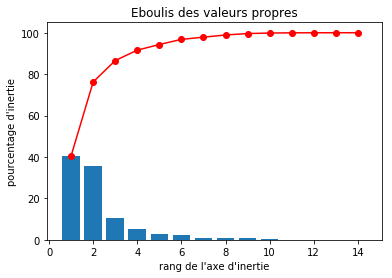

In [36]:
from functions_ACP import *
from sklearn import decomposition
X = sc_films_test2[variables].values

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

pca = decomposition.PCA(svd_solver='full')
pca.fit(X_scaled)

display_scree_plot(pca)

On affichera donc le graphe en deux dimensions, comme le suggère l'éboulis des valeurs propres.

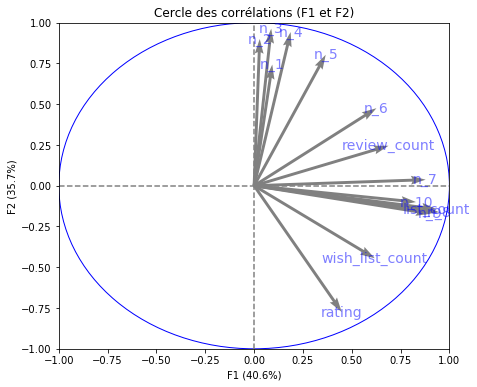

In [37]:
# Cercle corrélation
pcs = get_correlation(pca, X_scaled)
display_circles(pcs, 2, pca, [(0,1)], labels = np.array(variables))

Donc ici on voit que lesvaraibles des notes au dessus de 7 et que list_count sont très bien expliquées sur le premier axe.
On va donc créer une variable supplémentaire regroupant le nombre de notes au dessus de 7 et l'inclure dans le classement.
Par ailleurs pour essayer de continuer sur l'intuition de l'importance de la variable rating, on incluera une variable mesurant l'écart à la moyenne du classement pondérée par le nombre de personne l'ayant placé dans une liste.

In [38]:
sc_films_test2['n_sup'] = sc_films_test2['n_7']+sc_films_test2['n_8']+sc_films_test2['n_9']+ sc_films_test2['n_10']

In [39]:
sc_films_test2['mean_score_ecart'] = (sc_films_test2['rating'] -sc_films_test2['rating'].mean())/sc_films_test2['list_count']

In [40]:
variables = ['rating', 'wish_list_count', 'review_count', 'list_count', 'n_sup', 'mean_score_ecart']

In [41]:
from sklearn import preprocessing
X = sc_films_test2[variables].values

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [42]:
X_scaled=pd.DataFrame(X_scaled, columns=['rating', 'wish_list_count', 'review_count', 'list_count','n_sup', 'mean_score_ecart'])

In [43]:
X_scaled.head()

,rating,wish_list_count,review_count,list_count,n_sup,mean_score_ecart
0,-0.463288,-0.969880,-0.807381,-0.643836,-0.681160,-0.167420
1,-2.368595,-1.004675,-0.541626,-0.718301,-0.772397,-2.846179
2,-0.880640,-1.015746,-0.883310,-0.790843,-0.719588,-1.432072
3,0.525658,-0.099607,-0.839018,-0.458360,-0.549137,0.616297
4,1.215197,-0.258953,-0.725123,-0.300636,-0.467411,0.856293


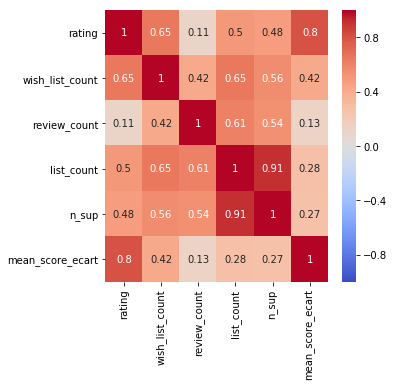

In [44]:
corr= X_scaled.corr()
plt.figure(figsize = (5,5))
ax = sns.heatmap(corr.round(2),
            vmin=-1,
            cmap='coolwarm',
            annot=True)

In [45]:
sc_films_test2['score'] = (X_scaled.iloc[:,0]*6
+ X_scaled.iloc[:,1]*2
+ X_scaled.iloc[:,2]*2
+ X_scaled.iloc[:,3]*6
+ X_scaled.iloc[:,4]*3
+ X_scaled.iloc[:,5]*3)/22
sc_films.head()


,id,title,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10
0,384461,"Cliffhanger, traque au sommet",1993-05-20,582,453,47,1087,43,103,227,490,1068,1605,1049,326,63,28
1,413007,Doom,2005-10-20,372,365,89,816,448,879,1141,1038,765,464,182,61,13,11
2,399603,Astérix et les Vikings,2006-04-05,536,337,35,552,46,143,265,608,1460,1520,736,170,30,25
3,380672,À tombeau ouvert,1999-10-22,691,2654,42,1762,15,32,74,187,461,1035,1659,1116,345,81
4,419113,Rebecca,1940-03-21,767,2251,60,2336,6,8,18,47,146,505,1467,1789,746,273


In [46]:
sc_films_test2["rank"] = sc_films_test2["score"].rank(ascending = False).astype('int64')
sc_films_test2.sort_values("rank",inplace=True) 
sc_films_test2.head()

,id,title,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,...,n_5,n_6,n_7,n_8,n_9,n_10,n_sup,mean_score_ecart,score,rank
2401,445539,Pulp Fiction,1994-09-10,833,20703,590,33039,4226,2052,2405,...,5243,9134,22591,46271,46478,34763,150103,0.006052,5.089872,1
2402,363185,Fight Club,1999-09-10,817,18462,752,29659,5615,2684,3127,...,6256,10343,24351,49070,45886,34955,154262,0.006202,4.852974,2
2400,471143,Inception,2010-07-14,754,17420,1217,25585,2887,2023,2909,...,8497,16674,35502,47817,31433,19314,134066,0.004727,4.410268,3
2397,432630,Django Unchained,2012-12-25,783,10248,1155,26802,737,534,850,...,3332,8840,23863,41193,28025,12057,105138,0.005594,3.980753,4
2389,388583,Interstellar,2014-11-05,784,9742,1377,28073,353,396,832,...,3249,7267,16374,25037,22629,14310,78350,0.005377,3.909732,5


In [47]:
comparaison = sc_films[0:100]

In [48]:
a = sc_films_test2.set_index('id').merge(top_100_films, left_index=True, right_on='id')

In [49]:
a['bool'] = abs(a['rank_x']-a['rank_y'])==0
exact_value = a['bool'].value_counts()[1]
print ('il y a :', exact_value, '% de films affectés à la bonne place')

il y a : 2 % de films affectés à la bonne place


In [50]:
a["dist"] = abs(a['rank_x'] - a['rank_y'])
test = a['dist'] <= 5
close_value = test.value_counts()[1]
print ('il y a :', close_value, '% de films affectés au bon classement à 5 place près')

il y a : 8 % de films affectés au bon classement à 5 place près


On a donc une baisse de la performance du score,incluons la pénalisation de la date 

Pénalisation de la date

In [51]:
sc_films_test2['year_release'] = sc_films_test2['date_release'].str.slice(0, 4).astype('int64')

In [52]:
import numpy as np
sc_films_test2['score'] = np.where(sc_films_test2['year_release'] >= 2015,
                                           sc_films_test2['score'] * 0.55,
                                           sc_films_test2['score']*0.45)
sc_films_test2.head()

,id,title,date_release,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,...,n_6,n_7,n_8,n_9,n_10,n_sup,mean_score_ecart,score,rank,year_release
2401,445539,Pulp Fiction,1994-09-10,833,20703,590,33039,4226,2052,2405,...,9134,22591,46271,46478,34763,150103,0.006052,2.290442,1,1994
2402,363185,Fight Club,1999-09-10,817,18462,752,29659,5615,2684,3127,...,10343,24351,49070,45886,34955,154262,0.006202,2.183838,2,1999
2400,471143,Inception,2010-07-14,754,17420,1217,25585,2887,2023,2909,...,16674,35502,47817,31433,19314,134066,0.004727,1.984620,3,2010
2397,432630,Django Unchained,2012-12-25,783,10248,1155,26802,737,534,850,...,8840,23863,41193,28025,12057,105138,0.005594,1.791339,4,2012
2389,388583,Interstellar,2014-11-05,784,9742,1377,28073,353,396,832,...,7267,16374,25037,22629,14310,78350,0.005377,1.759379,5,2014


In [53]:
sc_films_test2["rank"] = sc_films_test2["score"].rank(ascending = False).astype('int64')
sc_films_test2.sort_values("rank",inplace=True) 

In [54]:
comparaison = sc_films_test2[0:100]

In [55]:
a = comparaison.set_index('id').merge(top_100_films, left_index=True, right_on='id')

In [56]:
a['bool'] = abs(a['rank_x']-a['rank_y'])==0
exact_value = a['bool'].value_counts()[1]

print ('il y a :', exact_value, '% de films affectés à la bonne place')

il y a : 1 % de films affectés à la bonne place


In [57]:
a["dist"] = abs(a['rank_x'] - a['rank_y'])

test = a['dist'] <= 5
close_value = test.value_counts()[1]

print ('il y a :', close_value, '% de films affectés au bon classement à 5 place près')

il y a : 10 % de films affectés au bon classement à 5 place près


Avec ces nouvelles variables on perd donc de la prédiction. Il faudrait donc soit rester au modèle simple, soit trouver de nouveaux indicateurs ou ajouter de nouvelles données.

# Clustering

Nous allons maintenant effectuer des méthodes de clustering pour voir si éventuellement d'autres informations pourraient ressortir.

In [58]:
sc_films = pd.read_csv('sc_films.csv')
top_100_films = pd.read_csv('top_100_films.csv')

In [59]:
col_encoding=['rating', 'wish_list_count', 'review_count', 'list_count','n_1','n_2','n_3','n_4','n_5','n_6','n_7','n_8','n_9','n_10']
for i in col_encoding:
    sc_films[i]=preprocessing.LabelEncoder().fit_transform(sc_films[i])

## CAH

In [60]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score

In [61]:
variables = ['rating', 'wish_list_count', 'review_count', 'list_count','n_1','n_2','n_3','n_4','n_5','n_6','n_7','n_8','n_9','n_10']

In [62]:
X=sc_films.drop(columns=["id","title","date_release"])
Z = linkage(X,'ward')

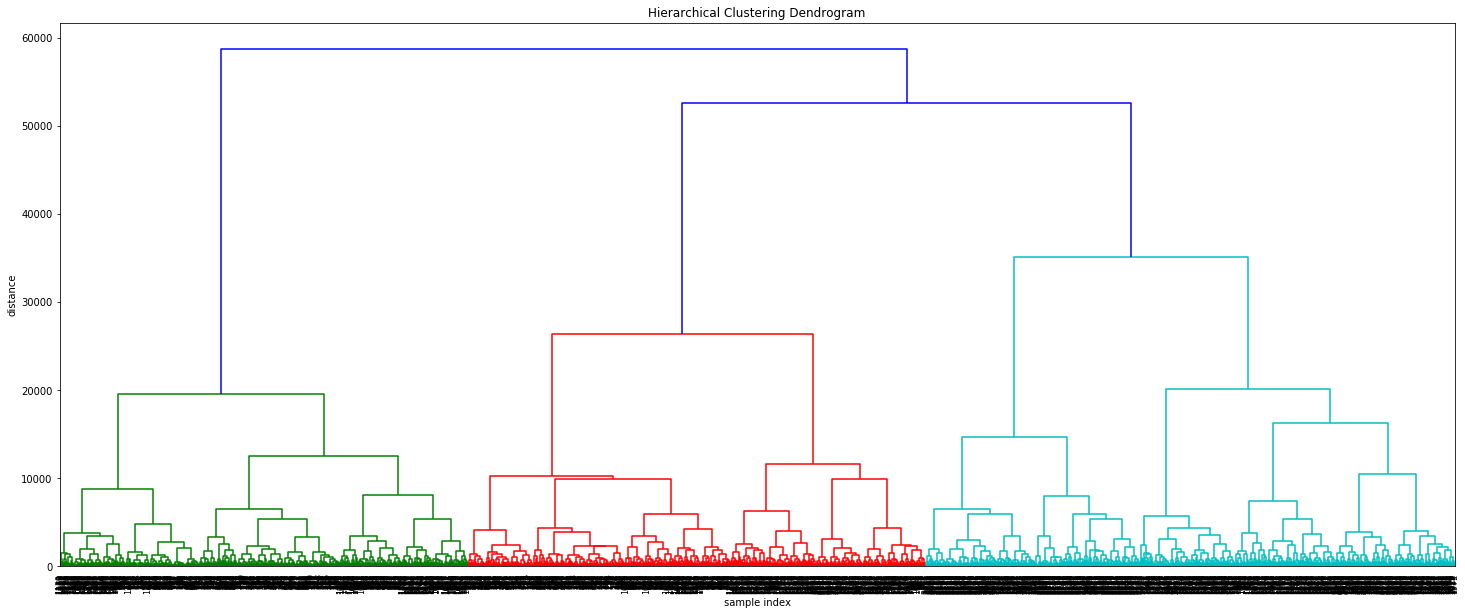

In [63]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,  
)
plt.show()

Ici on voit que le dendrogramme nous recommande 3 clusters, on affichera les scores silhouette pour le confirmer

In [64]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.25171405568562094
For n_clusters = 3 The average silhouette_score is : 0.28752805267827347
For n_clusters = 4 The average silhouette_score is : 0.2771990017086673
For n_clusters = 5 The average silhouette_score is : 0.24637318502895197
For n_clusters = 6 The average silhouette_score is : 0.22213520807950335


On prend le score silhouette max, donc clusters = 3, On va également faire un kmeans pour comparer à une autre méthode

## kmeans

In [65]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer =  KMeans(n_clusters=n_clusters,random_state=1)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3564034494050063
For n_clusters = 3 The average silhouette_score is : 0.3525345328901645
For n_clusters = 4 The average silhouette_score is : 0.32440053558861426
For n_clusters = 5 The average silhouette_score is : 0.30223887297833335
For n_clusters = 6 The average silhouette_score is : 0.27537535456973733


On trouve un conclusion différente, avec le kmeans et son score silhouette est supérieur. On choisira donc 2 clusters avec la méthode kmeans

In [66]:
groupes_kmeans = KMeans(n_clusters=2).fit_predict(X)
pd.Series(groupes_kmeans).value_counts()

1    1341
0    1062
dtype: int64

In [67]:
X['kmeans'] = groupes_kmeans
X.groupby('kmeans').mean()

,rating,wish_list_count,review_count,list_count,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9,n_10
kmeans,,,,,,,,,,,,,,
0,341.051789,1274.599812,214.672316,1415.608286,141.573446,210.646893,372.727872,631.112994,937.027307,1246.713748,1556.000942,1480.022599,964.238230,533.347458
1,239.838180,640.228934,100.428039,514.576435,170.023117,260.549590,412.290082,605.193139,723.414616,663.407159,577.189411,515.839672,282.644295,136.329605


On a donc deux clusters qui représentent des films qui ont une note en moyenne de 2.3 et ceux ayant en moyenne une note de 3.4



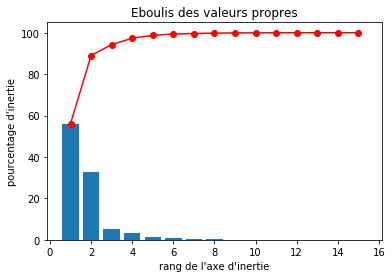

In [68]:
pca = decomposition.PCA(svd_solver='full')
pca.fit(X)

display_scree_plot(pca)

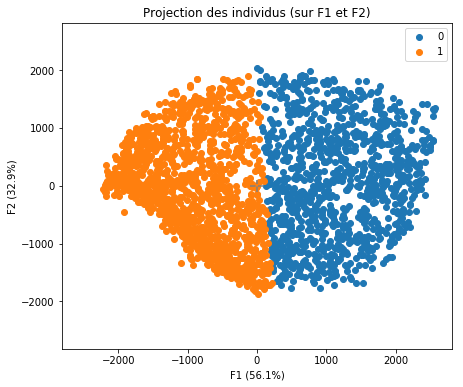

In [69]:
# Projection des individus
X_projected = pca.transform(X)
display_factorial_planes(X_projected, 2, pca, [(0,1)], illustrative_var = groupes_kmeans
                         )
plt.show()

Ici l'utilisation des méthodes de clustering ne semble pas intéressantes, pour définir des indicateurs pertinents, rien que le critère rating est divisé entre une note moyenne de 2,3 et 3,4. Si l'on considère que c'est un indicateur de classement alors nos intuitions de bases sont confirmés. Les films ayant reçu une meilleure note bénéfécie d'un nombre de critiques et de placements dans les listes plus élevés. Egalement ces films bénéfécient donc de moins de notes en dessous de la moyenne et plus au dessus de la moyenne. Le clustering ne nous apprend donc rien de nouveau sur nous intuitions.

Il conviendra donc pour établir un classement, qui correspond aux mieux d'éventuellement mieux pondérer les poids des différentes variables disponibles. Par ailleurs d'autre critères liés aux utilisateurs et les notes donnés par eux pourraient être un complément qui permettrait de mieux pondérer.

In [70]:
top_200_films = sc_films_test1[0:200]

In [71]:
top_200_films.to_csv('top_200_films.csv', index=False)